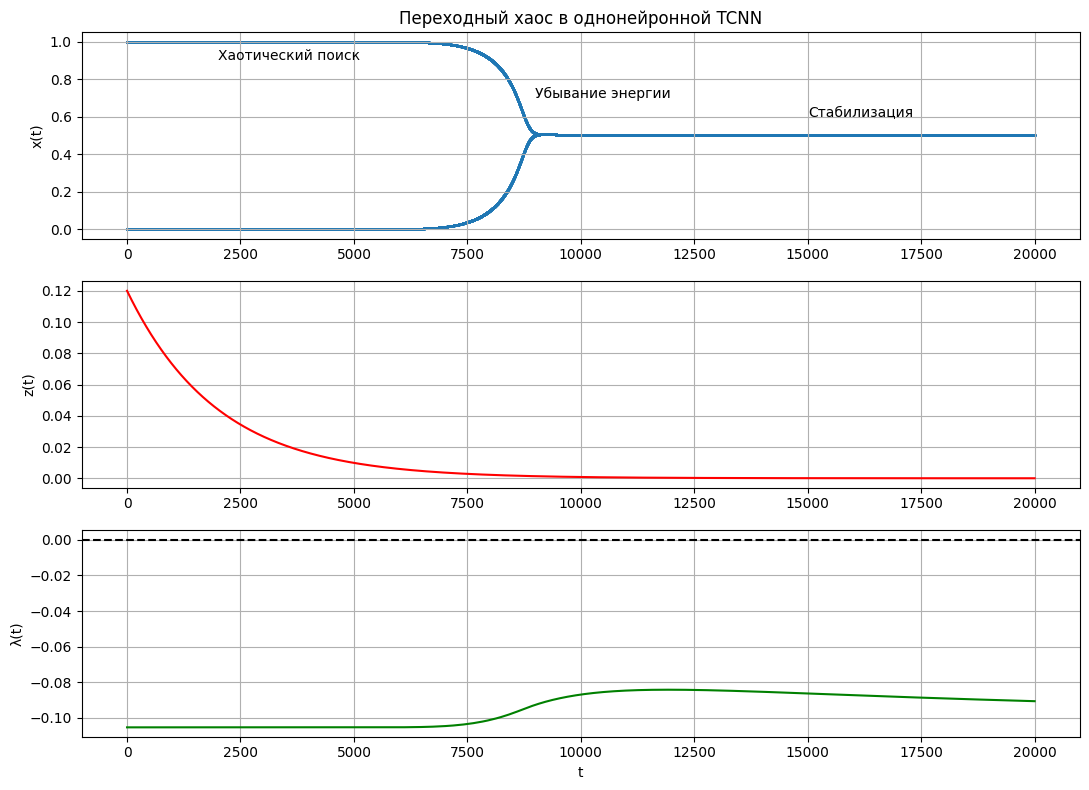

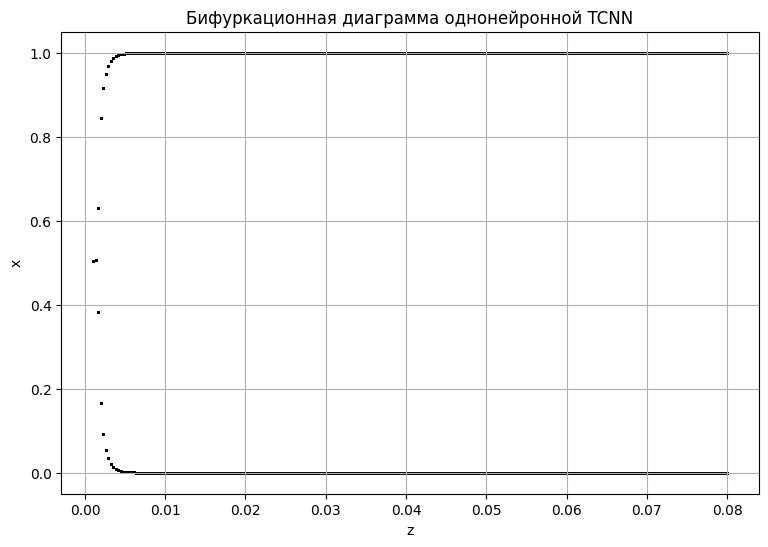

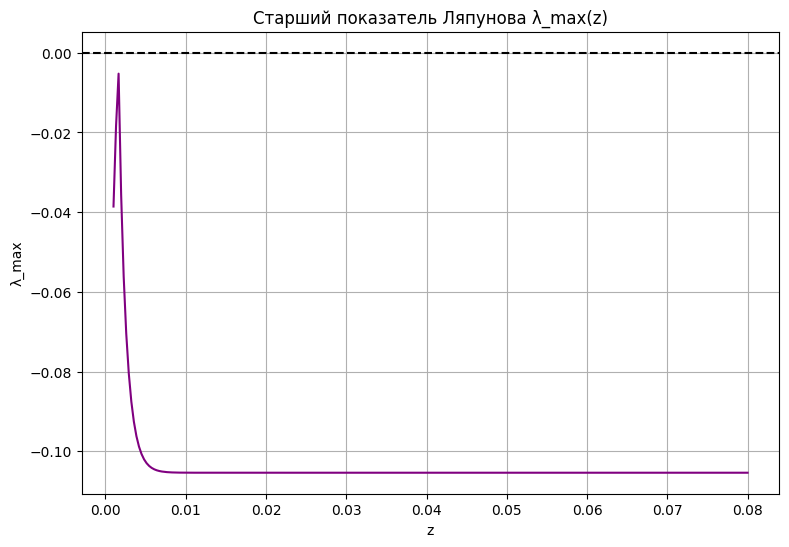

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# ПАРАМЕТРЫ (Cheng–Aihara)
# ============================================================

k = -0.9
c = 1.0 / 250.0
I0 = 0.65
gamma = 0.0

z0 = 0.12
beta = 5e-4

y0 = 0.1

# ============================================================
# СИГМОИДА
# ============================================================

def sigmoid(y):
    return 1.0 / (1.0 + np.exp(-y / c))

# ============================================================
# 1. ПЕРЕХОДНОЙ ХАОС (z(t) → 0)
# ============================================================

T = 20000
y = y0
z = z0

x_hist = []
z_hist = []
lyap_t = []

s = 0.0

for t in range(T):
    x = sigmoid(y)

    exp_term = np.exp(-y / c)
    fp = (1.0 / c) * exp_term / (1.0 + exp_term)**2
    deriv = k - z * fp

    s += np.log(abs(deriv) + 1e-14)
    lyap_t.append(s / (t + 1))

    x_hist.append(x)
    z_hist.append(z)

    y = k * y + gamma - z * (x - I0)
    z *= (1 - beta)

# ===== ГРАФИКИ ПЕРЕХОДНОГО ХАОСА =====

plt.figure(figsize=(11, 8))

plt.subplot(3, 1, 1)
plt.scatter(range(T), x_hist, s=1)
plt.ylabel("x(t)")
plt.title("Переходный хаос в однонейронной TCNN")
plt.text(2000, 0.9, "Хаотический поиск")
plt.text(9000, 0.7, "Убывание энергии")
plt.text(15000, 0.6, "Стабилизация")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(z_hist, color="red")
plt.ylabel("z(t)")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(lyap_t, color="green")
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("λ(t)")
plt.xlabel("t")
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================================================
# 2. БИФУРКАЦИОННАЯ ДИАГРАММА x(z)
# ============================================================

z_vals = np.linspace(0.001, 0.08, 250)
Z, X = [], []

for z_fix in z_vals:
    y = y0
    for t in range(7000):
        x = sigmoid(y)
        y = k * y + gamma - z_fix * (x - I0)
        if t > 3000:
            Z.append(z_fix)
            X.append(x)

plt.figure(figsize=(9, 6))
plt.scatter(Z, X, s=0.2, color="black")
plt.xlabel("z")
plt.ylabel("x")
plt.title("Бифуркационная диаграмма однонейронной TCNN")
plt.grid(True)
plt.show()

# ============================================================
# 3. СТАРШИЙ ПОКАЗАТЕЛЬ ЛЯПУНОВА λ_max(z)
# ============================================================

lyap_max = []

for z_fix in z_vals:
    y = y0
    s = 0.0
    for _ in range(7000):
        exp_term = np.exp(-y / c)
        fp = (1.0 / c) * exp_term / (1.0 + exp_term)**2
        deriv = k - z_fix * fp
        s += np.log(abs(deriv) + 1e-14)

        x = sigmoid(y)
        y = k * y + gamma - z_fix * (x - I0)

    lyap_max.append(s / 7000)

plt.figure(figsize=(9, 6))
plt.plot(z_vals, lyap_max, color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("z")
plt.ylabel("λ_max")
plt.title("Старший показатель Ляпунова λ_max(z)")
plt.grid(True)
plt.show()
